buffer.ipynb is for propossing audios, getting tags, printing final scores...
----

In [22]:
from pydub import AudioSegment

In [23]:
originsound = AudioSegment.from_wav("audio\joram-moments_of_clarity-08-solipsism-59-88.wav")

first_3sec = originsound[:3*1000]   #　uncomment this line to obtain first batch audio of original audio
first_3sec.export("first_3sec.wav", format="wav")


<_io.BufferedRandom name='first_3sec.wav'>

In [24]:
from musicnn_keras.tagger import top_tags


top_tags('Outputs\piano_to_classic\Audio_out000.wav', model='MTT_musicnn', topN=5)
# top_tags('first_2.wav', model='MTT_musicnn', topN=10)
top_tags('Outputs\piano_to_classic\Audio_out001.wav', model='MTT_musicnn', topN=5)
top_tags('Outputs\piano_to_classic\Audio_out002.wav', model='MTT_musicnn', topN=5)
top_tags('Outputs\piano_to_classic\Audio_out003.wav', model='MTT_musicnn', topN=5)
top_tags('Outputs\piano_to_classic\Audio_out004.wav', model='MTT_musicnn', topN=5)
# top_tags('techno_taggram1\Audio_out005.wav', model='MTT_musicnn', topN=5)

# top_tags('bndense2\Audio_out003.wav', model='MTT_musicnn', topN=5)
# top_tags('bndense2\Audio_out004.wav', model='MTT_musicnn', topN=5)

# top_tags('audio\whitenoise.wav',topN=5)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..[Outputs\piano_to_classic\Audio_out000.wav] Top5 tags: 
 - piano
 - solo
 - fast
 - no vocals
 - slow
Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..[Outputs\piano_to_classic\Audio_out001.wav] Top5 tags: 
 - piano
 - classical
 - solo
 - fast
 - classic
Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..[Outputs\piano_to_classic\Audio_out002.wav] Top5 tags: 
 - piano
 - classical
 - solo
 - fast
 - classic
Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..[Outputs\piano_to_classic\Audio_out003.wav] Top5 tags: 
 - piano
 - classical
 - solo
 - fast
 - classic
Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..[Outputs\piano_to_classic\Audio_out004.wav] Top5 tags: 
 - piano
 - classical
 - solo
 - fast
 - classic


['piano', 'classical', 'solo', 'fast', 'classic']

In [29]:
from pydub import AudioSegment
from musicnn_keras.extractor import extractor


file_name = 'Outputs\piano_to_classic\Audio_out003.wav'
# file_name = file_name[:3*1000]   #　uncomment this line to obtain first batch audio of original audio
testT0 = AudioSegment.from_wav(file_name)
testT0 = [testT0*10]
playlist = AudioSegment.empty()
for sound in testT0:
    playlist += sound
    playlist.export(file_name, format="wav")


taggram, tags, features = extractor(file_name, model='MTT_musicnn', extract_features=True)


print(taggram[0,2])   # class "slow"
# print(taggram[0,5])   # class "techno"
# print(taggram[0,13])  # class "vocal"


Computing spectrogram (w/ librosa) and tags (w/ tensorflow)..3.3750382e-06


In [30]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

def depict_features(features, coordinates, title, aspect='auto', xlabel=True, fontsize=13):
    # plot features in coordinates
    ax = plt.subplot(coordinates) 
    plt.imshow(features.T, interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')' )
    ax.title.set_fontsize(fontsize)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('(time frames)', fontsize=fontsize)

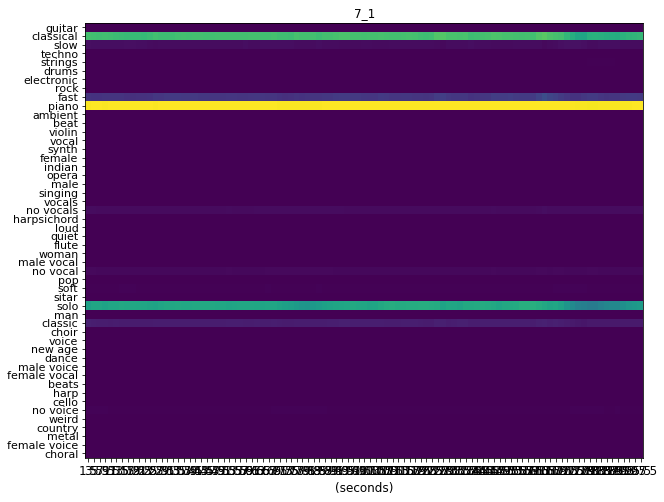

In [34]:
import numpy as np

in_length = 3 # seconds -- by default, the model takes inputs of 3 seconds with no overlap


# depict taggram
plt.rcParams["figure.figsize"] = (10,8)
fontsize=12
fig, ax = plt.subplots()
ax.imshow(taggram.T, interpolation=None, aspect="auto")

# title
ax.title.set_text('7_1')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

plt.show()

working
time: 642185
wave_data: 642185


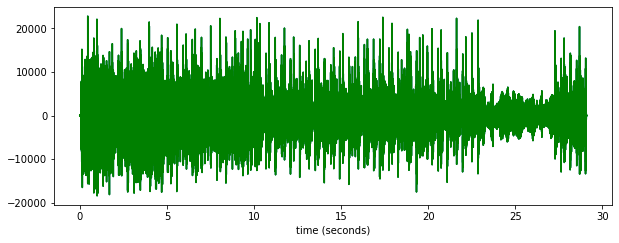

In [28]:
import wave
import pylab as pl
import numpy as np

print('working')

file = wave.open("audio\joram-moments_of_clarity-08-solipsism-59-88.wav")


# (nchannels, sampwidth,framerate, nframes, comptype, compname)
params = file.getparams()
nchannels,sampwidth,framerate,nframes = params[:4]


str_data = file.readframes(nframes)
file.close()

wave_data = np.fromstring(str_data, dtype=np.short)
wave_data.shape = (-1, 2)

wave_data = wave_data.T  
time = np.arange(0, nframes) * (1.0 / framerate)
print ("time:", len(time))
print ("wave_data:", len(wave_data[0][0:len(time)]))


pl.subplot(2, 1, 1)  
pl.plot(time, wave_data[0][0:len(time)])
# pl.subplot(2, 1, 2)  

pl.plot(time, wave_data[1][0:len(time)], c="g")
pl.xlabel("time (seconds)")
pl.show()